## Persiapan Dataset

In [1]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('flaskr/static/img/dataset', target_size = (256, 256), batch_size = 32, class_mode = 'categorical')
valid_generator = valid_datagen.flow_from_directory('flaskr/static/img/dataset', target_size = (256, 256), batch_size = 32, class_mode = 'categorical')

class_names = list(train_generator.class_indices.keys())
print(class_names)

Found 103 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
['antraknosa', 'culvularia_sp']


## Persiapan Model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=train_generator.image_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(train_generator.image_shape[0], activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model

d:\Project\2024\08-Agustus\cnnsawit\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [3]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=50
    )

Epoch 1/50


d:\Project\2024\08-Agustus\cnnsawit\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5760 - loss: 3.9469 - val_accuracy: 0.7292 - val_loss: 3.2502
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.7188 - loss: 2.4406 - val_accuracy: 0.7143 - val_loss: 0.5977
Epoch 3/50


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4691 - loss: 0.7898 - val_accuracy: 0.7500 - val_loss: 0.6006
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7188 - loss: 0.6465 - val_accuracy: 0.4286 - val_loss: 0.8733
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7748 - loss: 0.5756 - val_accuracy: 0.7188 - val_loss: 0.6076
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6562 - loss: 0.6657 - val_accuracy: 0.8571 - val_loss: 0.4982
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7852 - loss: 0.5753 - val_accuracy: 0.7292 - val_loss: 0.6122
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4286 - loss: 0.7588 - val_accuracy: 0.7143 - val_loss: 0.6297
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6873 - loss: 0.6615 - val_accuracy: 0.7083 - val_loss: 0.6496
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7812 - loss: 0.6389 - val_accuracy: 1.0000 - val_loss: 0.5704
Epoch 11/50
3/3 ━━

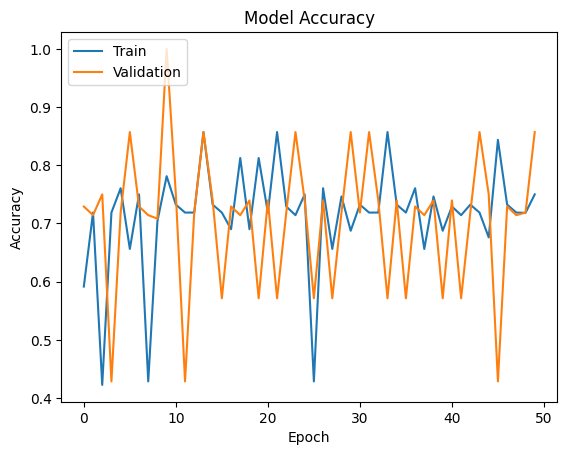

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
import pickle

with open('models/a.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import numpy as np

for images, labels in train_generator:
    num_images = min(len(images), 9)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle('Sample Images')
    if num_images == 1:
        axs = [axs]

    for i in range(num_images):
        axs[i].imshow(images[i])
        axs[i].set_title('Label: ' + class_names[np.argmax(labels[i])])
        axs[i].axis('off')

    plt.show()
    break

: 

In [6]:
scores = model.evaluate(valid_generator)
print(f'Akurasi: {scores[1]*100}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.7371 - loss: 0.6014
Akurasi: 72.81553149223328%


In [7]:
from tensorflow.keras.preprocessing import image 
import numpy as np

def predict_image(model, image_path, target_size=(256, 256)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

In [8]:
new_image_path = 'flaskr/static/img/dataset/antraknosa/15.jpg'

predicted_class, predictions = predict_image(model, new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


In [9]:
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted Class: {predicted_class[0]}')
print(f'Predicted Label: {predicted_label}')
print(f'Predictions: {predictions[0]}')

Predicted Class: 0
Predicted Label: antraknosa
Predictions: [0.5953495 0.4046505]


In [21]:
import pathlib
desktop = pathlib.Path("flaskr/static/img/dataset")

images = list(filter(lambda item: item.is_file(), desktop.rglob("*.jpg")))
urls = {}

for image in images:
    name = image.as_posix().replace(desktop.as_posix() + "/", "")
    if name.split("/")[0] not in urls:
        urls[name.split("/")[0]] = [name]
    else:
        urls[name.split("/")[0]].append(name)
urls

{'antraknosa': ['antraknosa/1.jpg',
  'antraknosa/10.jpg',
  'antraknosa/11.jpg',
  'antraknosa/12.jpg',
  'antraknosa/13.jpg',
  'antraknosa/14.jpg',
  'antraknosa/15.jpg',
  'antraknosa/16.jpg',
  'antraknosa/17.jpg',
  'antraknosa/18.jpg',
  'antraknosa/19.jpg',
  'antraknosa/2.jpg',
  'antraknosa/20.jpg',
  'antraknosa/21.jpg',
  'antraknosa/22.jpg',
  'antraknosa/23.jpg',
  'antraknosa/24.jpg',
  'antraknosa/25.jpg',
  'antraknosa/26.jpg',
  'antraknosa/27.jpg',
  'antraknosa/28.jpg',
  'antraknosa/29.jpg',
  'antraknosa/3.jpg',
  'antraknosa/30.jpg',
  'antraknosa/31.jpg',
  'antraknosa/32.jpg',
  'antraknosa/33.jpg',
  'antraknosa/34.jpg',
  'antraknosa/35.jpg',
  'antraknosa/36.jpg',
  'antraknosa/37.jpg',
  'antraknosa/38.jpg',
  'antraknosa/39.jpg',
  'antraknosa/4.jpg',
  'antraknosa/40.jpg',
  'antraknosa/41.jpg',
  'antraknosa/42.jpg',
  'antraknosa/43.jpg',
  'antraknosa/44.jpg',
  'antraknosa/45.jpg',
  'antraknosa/46.jpg',
  'antraknosa/47.jpg',
  'antraknosa/48.jpg',
 

In [24]:
model.save('models/a.keras')